# Table of Contents
0. Notebook Setup
1. Data Cleaning
2. Visualizing Dataframes
3. Exporting

### 0. Notebook Setup

In [20]:
# 0.0 - Notebook Setup
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Setting the directory
os.chdir('C:\\Users\\Bruen\\Dropbox\\My PC (DESKTOP-V41C1LD)\\Desktop\\Data Science Portfolio\\Datasets')

In [3]:
# Reading our .csv we pulled from https://www.kaggle.com/jackdaoud/marketing-data
shopdf = pd.read_csv('mnt_marketing_data.csv')

### 1. Data Cleaning

All in all, these are the dataframes we're creating

| Dataframe | Description |
| :----------- | :----------- |
| productsdf | Sum of numerical values, intended for simple Tableau bar chart |
| shopdf | Not formatted for Tableau, is used to create shopmatrixdf |
| shopmatrixdf | shopdf with .melt applied, is properly formatted for our use in Tableau |

*In order to create a many-to-many correlation matrix with our cleaned data (**'shopdf'**), we would need to use multiple pivots in Tableau to restructure our columns. Tableau only allows for a single pivot, so instead, I've opted to use the .melt function while we're still in Python to create a new, Tableau-friendly dataframe: **'shopmatrixdf'**

In [4]:
# Let's take a look at our data
display(shopdf)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [5]:
shopdf.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [6]:
# Before we do anything, let's take an inventory of our datatypes
# Income has extra white space and should be a float 
# Dt_Customer should be a datetime
# Year_Birth is great as an int - Tableau can interpret four-character ints as years
shopdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
# Stripping extra whitespace from column values
shopdf.columns = shopdf.columns.str.replace(' ', '')

In [8]:
# Converting Income values to float
shopdf['Income'] = shopdf['Income'].replace('^[$]',"",regex=True)
shopdf['Income'] = shopdf['Income'].replace(',',"",regex=True).astype(float)

In [9]:
# Converting Dt_Customer values to datetime
shopdf['Dt_Customer'] = pd.to_datetime(shopdf['Dt_Customer'])

In [10]:
# Converting Year_Birth to a new Age column
# Then dropping Year_Birth
# We don't need their exact age to the date - year is just fine for our intentions
shopdf['Age'] = 2021 - shopdf.Year_Birth
shopdf.drop(columns = 'Year_Birth', inplace= True)

In [11]:
# Then we'll rename a few columns for readability
# All AcceptedCmp# columns will be shortened to Cmp#
# Response is similar to the AcceptedCmp# columns (for the last campaign). It will be renamed Cmp6
shopdf.columns = ['ID', 'Education', 'Marital_Status', 'Income', 'KidHome',
       'TeenHome', 'Dt_Customer', 'Recency', 'WineSales', 'FruitSales',
       'MeatSales', 'FishSales', 'SweetSales', 'GoldSales', 'DealPurchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'WebVisitsMonth',
       'Cmp3', 'Cmp4', 'Cmp5', 'Cmp1', 'Cmp2', 'Cmp6', 'Complaints', 'Country', 'Age']

In [12]:
# And now rearranging the Cmp# columns in numerical order
shopdf = shopdf[['ID', 'Age', 'Recency', 'Income', 'KidHome', 'TeenHome', 'Complaints', 
        'Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5', 'Cmp6', 'Education', 'Marital_Status', 
        'Dt_Customer', 'WineSales', 'FruitSales', 'MeatSales', 'FishSales', 'SweetSales', 
        'GoldSales', 'CatalogPurchases', 'DealPurchases','StorePurchases', 'WebPurchases', 'WebVisitsMonth', 'Country']]

In [13]:
# In Tableau, we'll be making a simple bar chart with sales totals of each product category
# Creating another quick dataframe here will save us a bit of time later on
productsdf = pd.DataFrame(shopdf[['WineSales', 'GoldSales', 'FishSales', 'SweetSales', 'FruitSales', 'MeatSales', \
            'StorePurchases', 'WebPurchases', 'CatalogPurchases', 'Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5', 'Cmp6']] 
            .sum().sort_values(), columns = ['Total'])
display(productsdf)

,Total
Cmp2,30
Cmp1,144
Cmp3,163
Cmp5,163
Cmp4,167
Cmp6,334
CatalogPurchases,5963
WebPurchases,9150
StorePurchases,12970
FruitSales,58917


In [14]:
# Mean will be calculated here to double-check our future Tableau calculations
meandf = pd.DataFrame(shopdf[['Age', 'Income']] 
            .mean().sort_values(), columns = ['Mean'])
display(meandf)

,Mean
Age,52.194196
Income,52247.251354


The importance of marital status as a metric is its pertinence to detailed targeting in FB/IG ads. 
We can target a few different types of relationship statuses, however our dataset includes some undesirable/ambiguous values.

In addition to Married and Single, it contains:

- Together
- Divorced
- Widowed
- Alone
- Absurd
- Yolo

There is no documentation to elaborate on the meaning of these values. 
While some inferences can be made, they were grouped into a collective Other category for the sake of consistency.

In [15]:
# Using a for loop to recategorize Marital Status values
Marital_Type = []
for i in shopdf.Marital_Status:
    if i == 'Married':
        Marital_Type.append('Married')
    elif i == 'Single':
        Marital_Type.append('Single')
    else:
        Marital_Type.append('Other')
shopdf['Marital_Status'] = Marital_Type
    

### 2. Visualizing Dataframes

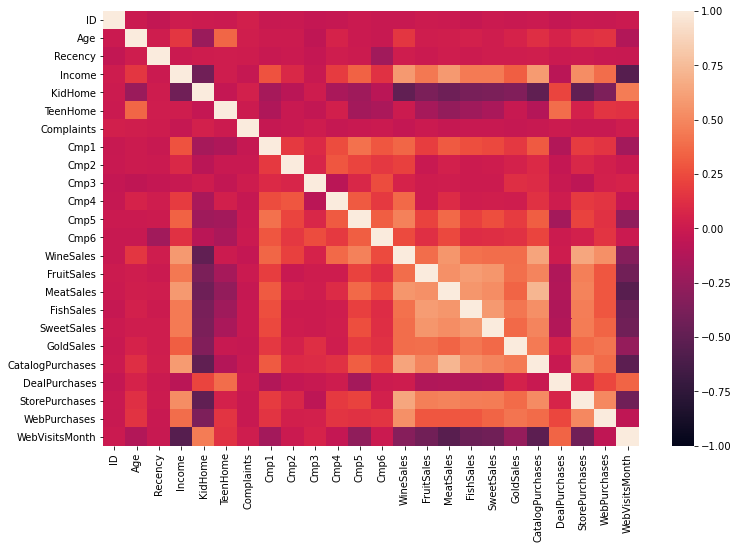

In [34]:
# We can use Seaborn to imagine how our Correlation Matrix might look in Tableau
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(shopdf.corr(), vmin=-1, vmax=1)

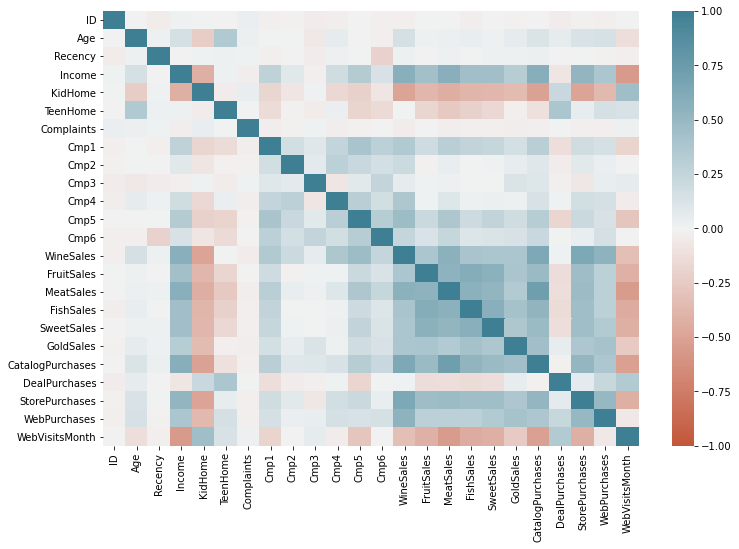

In [37]:
# Here it is again, with a more appropriate cmap
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(20, 220, as_cmap=True)
heatmap = sns.heatmap(shopdf.corr(), vmin=-1, vmax=1, cmap=cmap)

In [39]:
# We can use shopdf with Seaborn and many other cases in Tableau 
# But in order to create a corr matrix in Tableau, we'll have to restructure our data
# The .melt function will make all of this possible
# We'll apply .melt to 'shopdf' and create a brand new dataframe: 'shopmatrixdf'
shopmatrixdf = pd.melt(shopdf, id_vars=['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Country'], 
       value_vars=['Age', 'Income', 'KidHome','TeenHome', 'Recency', 'WineSales', 'FruitSales',
       'MeatSales', 'FishSales', 'SweetSales', 'GoldSales', 'DealPurchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'WebVisitsMonth', 'Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5',  'Cmp6', 'Complaints'])

In [41]:
# Our new dataframe looks great
display(shopmatrixdf)

,ID,Education,Marital_Status,Dt_Customer,Country,variable,value
0,1826,Graduation,Other,2014-06-16,SP,Age,51.0
1,1,Graduation,Single,2014-06-15,CA,Age,60.0
2,10476,Graduation,Married,2014-05-13,US,Age,63.0
3,1386,Graduation,Other,2014-05-11,AUS,Age,54.0
4,5371,Graduation,Single,2014-04-08,SP,Age,32.0
...,...,...,...,...,...,...,...
51515,10142,PhD,Other,2013-03-07,US,Complaints,0.0
51516,5263,2n Cycle,Married,2013-01-22,SP,Complaints,0.0
51517,22,Graduation,Other,2012-12-03,SP,Complaints,0.0
51518,528,Graduation,Married,2012-11-29,IND,Complaints,0.0


### 3. Exporting

In [40]:
# 2.0 - Our dataframes are now ready for export
shopmatrixdf.to_csv(path_or_buf= 'C:\\Users\\Bruen\\Dropbox\\My PC (DESKTOP-V41C1LD)\\Desktop\\Mnt_store_shopmatrixdf.csv')
shopdf.to_csv(path_or_buf= 'C:\\Users\\Bruen\\Dropbox\\My PC (DESKTOP-V41C1LD)\\Desktop\\Mnt_store_shopdf.csv')
productsdf.to_csv(path_or_buf= 'C:\\Users\\Bruen\\Dropbox\\My PC (DESKTOP-V41C1LD)\\Desktop\\Mnt_store_productsdf.csv')